# **Pytorch and Tensorflow implementation of the model**

# **Step 1. Import the data from the given .csv file (diabetes.csv Download diabetes.csv).**
**The first few columns contain the data while the last column is a binary class label of 0 or 1**

In [24]:
# Loading the dataset

import pandas as pd

df = pd.read_csv("/content/diabetes.csv")

In [25]:
df.shape

(758, 9)

In [26]:
# Assign column names 'f1' to 'f8' to the first 8 columns
df.columns = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8','label']

In [27]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,label
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


# **Step 2. Preprocess the data as you see fit and show basic data visualization for better understanding of data**



In [28]:
df.isnull().sum()

f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
label    0
dtype: int64

In [29]:
df.dtypes

f1       float64
f2       float64
f3       float64
f4       float64
f5       float64
f6       float64
f7       float64
f8       float64
label      int64
dtype: object

In [30]:
df.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,label
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,-0.407807,0.218208,0.176500,-0.289731,-0.323961,-0.032289,-0.663427,-0.516799,0.654354
std,0.386493,0.306465,0.201420,0.258651,0.375608,0.205508,0.283202,0.400674,0.475893
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.179583,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.748506,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087929,-0.532451,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]
print(X.shape)
print(y.shape)

(758, 8)
(758,)


In [32]:
X.head()

,f1,f2,f3,f4,f5,f6,f7,f8
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000


In [33]:
X.shape

(758, 8)

In [34]:
y.shape

(758,)

**Data Visualizations**

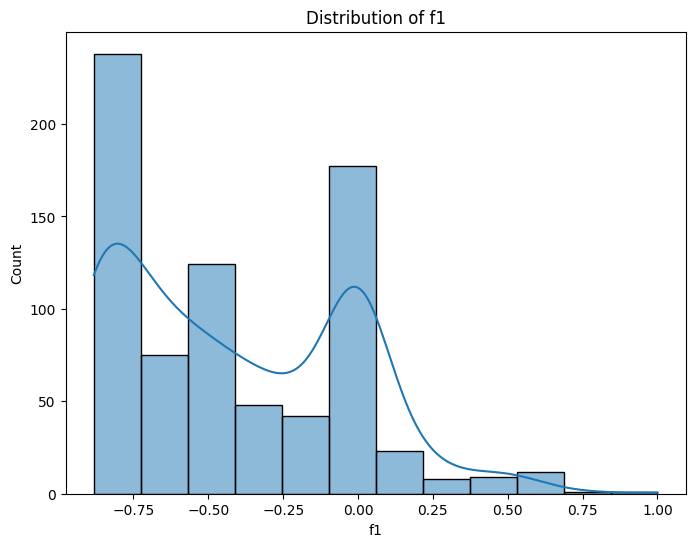

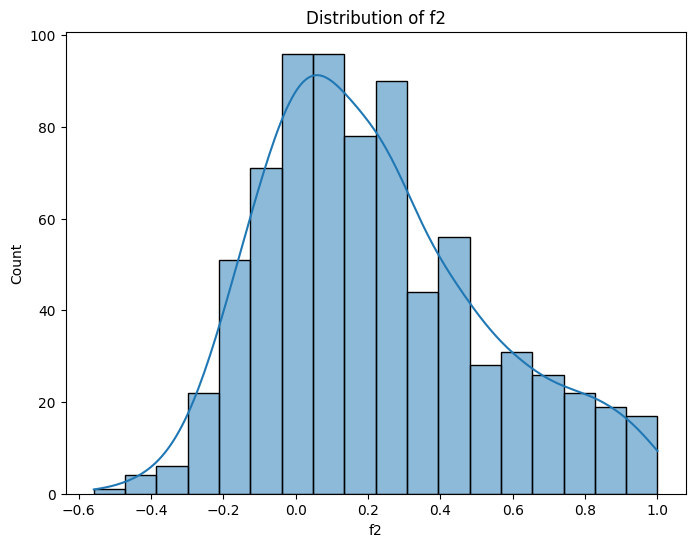

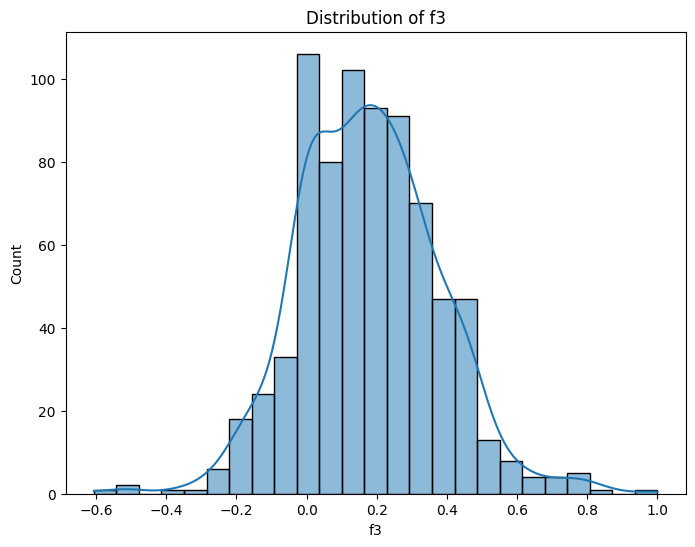

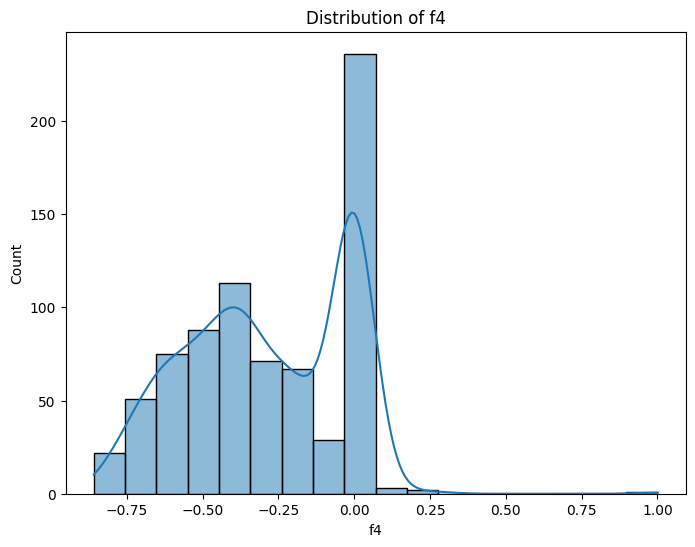

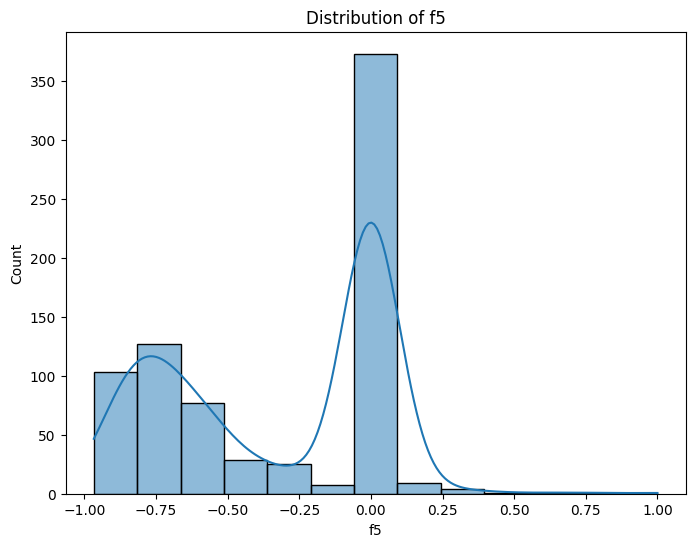

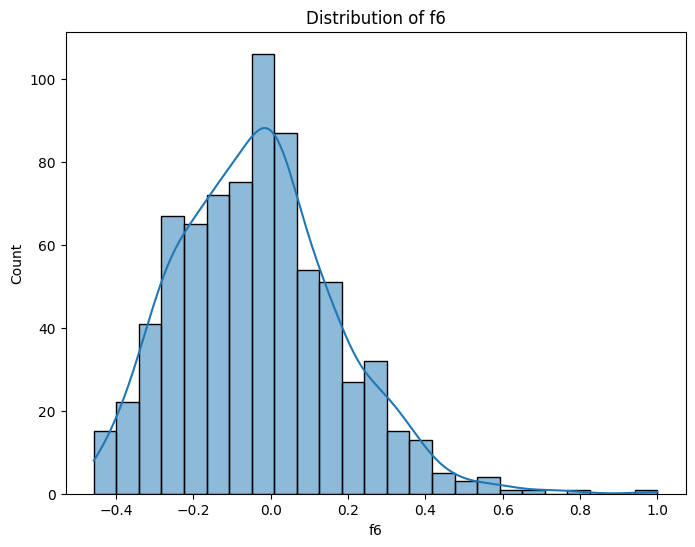

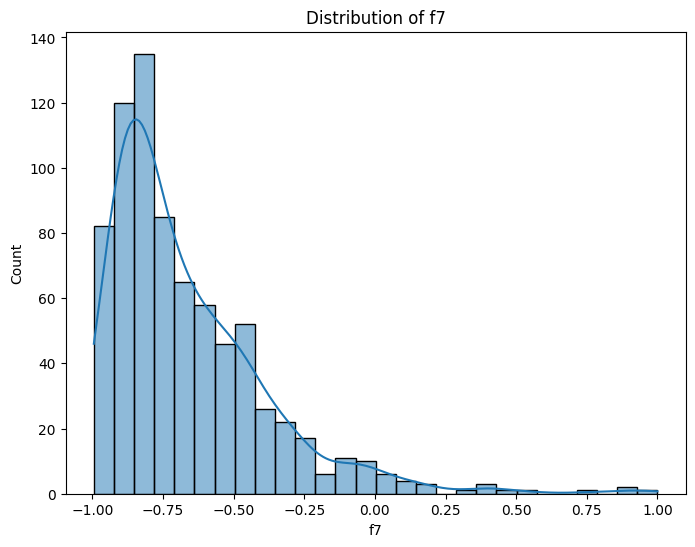

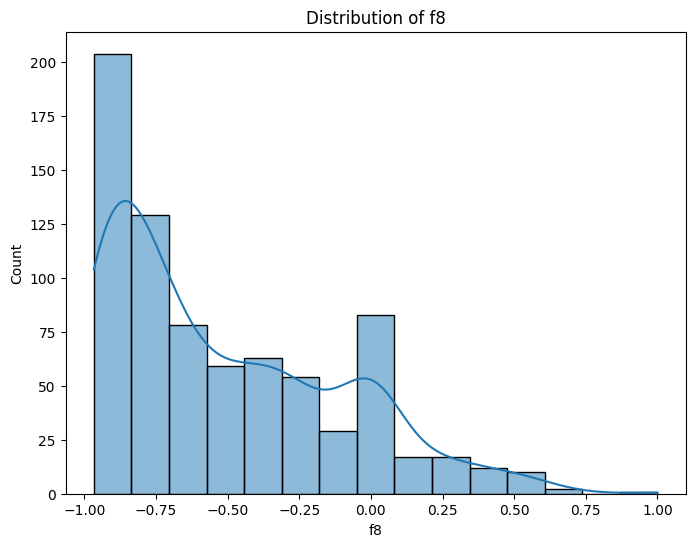

In [35]:

import matplotlib.pyplot as plt
import seaborn as sns

for feature in X.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(X[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


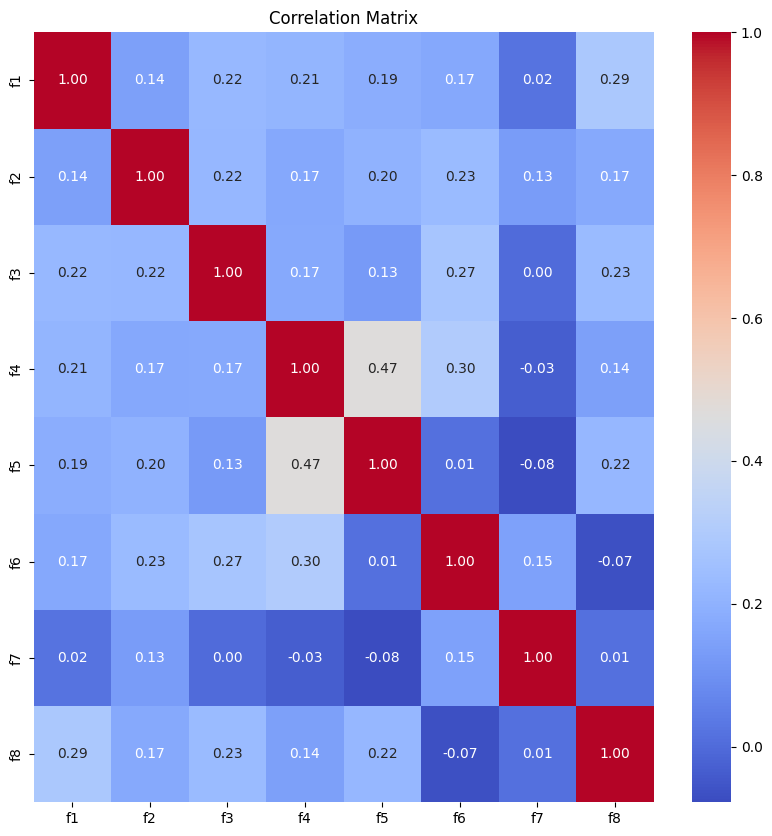

In [36]:
# Show the correlation between features
correlation_matrix = X.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


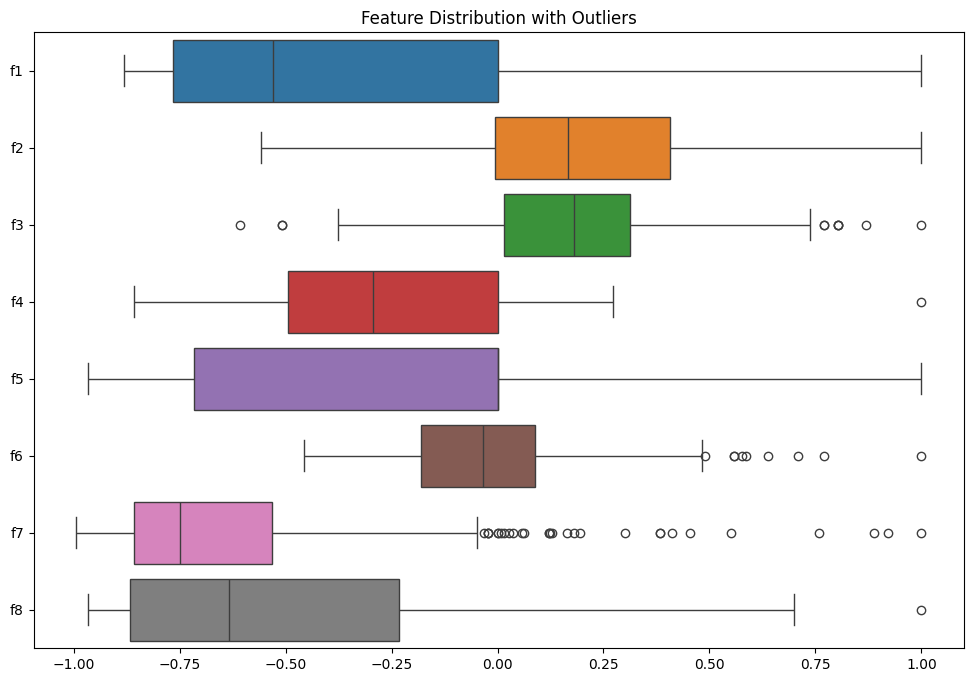



 The proportion of outliers to the total records is: 6.20% 




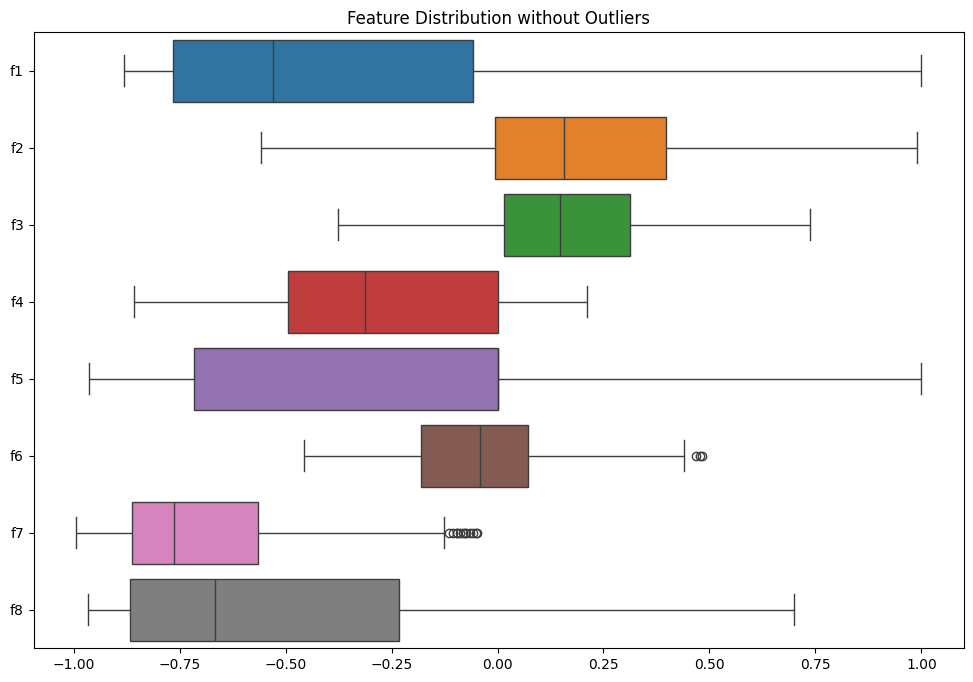

In [37]:
# Identify and handle outliers in the features dataframe

# Boxplot for visualizing the distribution of each feature to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=X, orient='h')
plt.title('Feature Distribution with Outliers')
plt.show()

# Identify and handle outliers using the Interquartile Range (IQR) method
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)

# Calculate the proportion of outliers to the total records
proportion_outliers = outliers.sum() / len(X)
print(f"\n\n The proportion of outliers to the total records is: {proportion_outliers:.2%} \n\n")


X_no_outliers = X[~outliers]

# Boxplot for visualizing the distribution of each feature without outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_no_outliers, orient='h')
plt.title('Feature Distribution without Outliers')
plt.show()

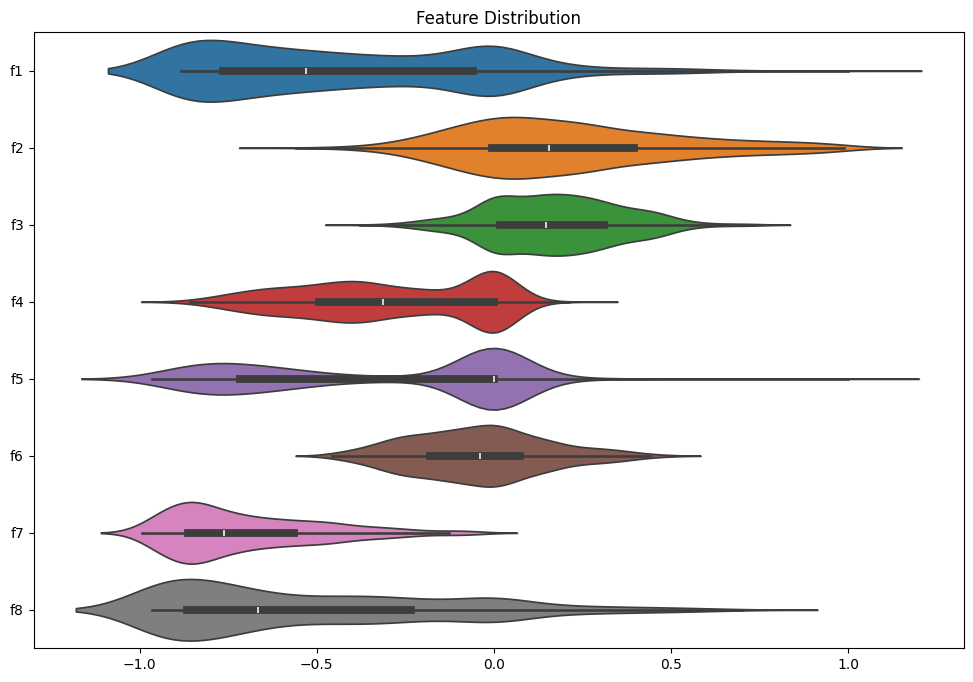

In [38]:
# Violin plot for visualizing the distribution of each feature
plt.figure(figsize=(12, 8))
sns.violinplot(data=X_no_outliers, orient='h')
plt.title('Feature Distribution')
plt.show()

Observations from the visualizations:
1. All the features values are normalized between -1 to 1
2. There are approximately 6.20% of outliers which have been deleted.


In [39]:
y_no_outliers = y[~outliers]

# **Step 3. Split into 80% train 20% test**

In [40]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80:20
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)


In [41]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (568, 8)
Shape of X_test: (143, 8)
Shape of y_train: (568,)
Shape of y_test: (143,)


# **Pytorch Implementation**

In [104]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert features and labels into tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [43]:
y_test_tensor = y_test_tensor.reshape(-1, 1)
y_train_tensor = y_train_tensor.reshape(-1,1)

In [44]:
print(X_train_tensor.shape)
print(y_train_tensor.shape)
print(X_test_tensor.shape)
print(y_test_tensor.shape)

torch.Size([568, 8])
torch.Size([568, 1])
torch.Size([143, 8])
torch.Size([143, 1])


# **Build Model**

**Step 4. Modify the model shown in the demo to take the new data**

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim

In [46]:
model = nn.Sequential(
    nn.Linear(8, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

In [47]:
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


# **Step 5. Train the model on the data**

In [48]:
loss_fn = nn.MSELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [49]:
n_epochs = 100
batch_size = 32

for epoch in range(n_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        Xbatch = X_train_tensor[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y_train_tensor[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 0.2736543118953705
Finished epoch 1, latest loss 0.2664012312889099
Finished epoch 2, latest loss 0.2598974406719208
Finished epoch 3, latest loss 0.25256383419036865
Finished epoch 4, latest loss 0.24357526004314423
Finished epoch 5, latest loss 0.23226653039455414
Finished epoch 6, latest loss 0.21805833280086517
Finished epoch 7, latest loss 0.20361733436584473
Finished epoch 8, latest loss 0.19179321825504303
Finished epoch 9, latest loss 0.18333786725997925
Finished epoch 10, latest loss 0.17693032324314117
Finished epoch 11, latest loss 0.171334907412529
Finished epoch 12, latest loss 0.16605724394321442
Finished epoch 13, latest loss 0.1609107404947281
Finished epoch 14, latest loss 0.15596508979797363
Finished epoch 15, latest loss 0.15110887587070465
Finished epoch 16, latest loss 0.14659802615642548
Finished epoch 17, latest loss 0.14231418073177338
Finished epoch 18, latest loss 0.13793139159679413
Finished epoch 19, latest loss 0.13385391235351

# **Step 6. Make predictions on the test data and compare them to the test labels**

# **Step 7. Calculate the accuracy of your results**

In [103]:
# compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred = model(X_train_tensor)

accuracy = (y_pred.round() == y_train_tensor).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.7869718074798584


In [51]:
# compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred = model(X_test_tensor)

accuracy = (y_pred.round() == y_test_tensor).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.7272727489471436


# **Step 8. Hypothesize changes you can make to the model. Type out your hypothesis as comments in the code or in a text cell. (ex. doubling the width/depth of your NN, experiment thoroughly)**

**Hyperparamter Tuning - 1 :**

I have increased the width of the model, i.e  number of neurons in the hidden layer are increased in model_1.

In [52]:
model_1 = nn.Sequential(
    nn.Linear(8, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

In [53]:
print(model_1)

Sequential(
  (0): Linear(in_features=8, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


In [54]:
loss_fn = nn.MSELoss()  # binary cross entropy
optimizer = optim.Adam(model_1.parameters(), lr=0.001)

In [55]:
n_epochs = 200
batch_size = 32

for epoch in range(n_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        Xbatch = X_train_tensor[i:i+batch_size]
        y_pred_1 = model_1(Xbatch)
        ybatch = y_train_tensor[i:i+batch_size]
        loss = loss_fn(y_pred_1, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')


Finished epoch 0, latest loss 0.2147642821073532
Finished epoch 1, latest loss 0.20628291368484497
Finished epoch 2, latest loss 0.1983739584684372
Finished epoch 3, latest loss 0.1914987415075302
Finished epoch 4, latest loss 0.18577222526073456
Finished epoch 5, latest loss 0.1805443912744522
Finished epoch 6, latest loss 0.17538060247898102
Finished epoch 7, latest loss 0.1699528694152832
Finished epoch 8, latest loss 0.16454726457595825
Finished epoch 9, latest loss 0.15896353125572205
Finished epoch 10, latest loss 0.15323887765407562
Finished epoch 11, latest loss 0.1472960263490677
Finished epoch 12, latest loss 0.14070001244544983
Finished epoch 13, latest loss 0.13391093909740448
Finished epoch 14, latest loss 0.12641842663288116
Finished epoch 15, latest loss 0.1195468083024025
Finished epoch 16, latest loss 0.11310116201639175
Finished epoch 17, latest loss 0.10745842009782791
Finished epoch 18, latest loss 0.102639339864254
Finished epoch 19, latest loss 0.09854985028505325

**Step 9. Test your hypothesis by training your new models**

**Step 10. Show the results of your changed models by repeating steps 6 and 7. Discuss the differences and explain why**

In [56]:
# compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred_1 = model_1(X_train_tensor)

accuracy_1 = (y_pred_1.round() == y_train_tensor).float().mean()
print(f"Accuracy {accuracy_1}")

Accuracy 0.8169013857841492


In [97]:
with torch.no_grad():
    y_pred_1 = model_1(X_test_tensor)

accuracy_1 = (y_pred_1.round() == y_test_tensor).float().mean()
print(f"Accuracy {accuracy_1}")

Accuracy 0.7692307829856873


# **Hyperparameter Tuning - 2**

**I have increased the depth of the model i.e the number of hidden layers have been increased in the model_2.**

In [58]:
model_2 = nn.Sequential(
    nn.Linear(8, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

In [59]:
print(model_2)

Sequential(
  (0): Linear(in_features=8, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=8, bias=True)
  (7): ReLU()
  (8): Linear(in_features=8, out_features=1, bias=True)
  (9): Sigmoid()
)


In [60]:
loss_fn = nn.MSELoss()  # binary cross entropy
optimizer = optim.Adam(model_2.parameters(), lr=0.001)

In [61]:
n_epochs = 200
batch_size = 32

for epoch in range(n_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        Xbatch = X_train_tensor[i:i+batch_size]
        y_pred_2 = model_2(Xbatch)
        ybatch = y_train_tensor[i:i+batch_size]
        loss = loss_fn(y_pred_2, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')


Finished epoch 0, latest loss 0.25083762407302856
Finished epoch 1, latest loss 0.23928433656692505
Finished epoch 2, latest loss 0.2215016633272171
Finished epoch 3, latest loss 0.19754080474376678
Finished epoch 4, latest loss 0.17810304462909698
Finished epoch 5, latest loss 0.16551566123962402
Finished epoch 6, latest loss 0.14986886084079742
Finished epoch 7, latest loss 0.13146917521953583
Finished epoch 8, latest loss 0.1163092777132988
Finished epoch 9, latest loss 0.10569409281015396
Finished epoch 10, latest loss 0.09660398215055466
Finished epoch 11, latest loss 0.09000550955533981
Finished epoch 12, latest loss 0.08517449349164963
Finished epoch 13, latest loss 0.08086378127336502
Finished epoch 14, latest loss 0.07649758458137512
Finished epoch 15, latest loss 0.07372834533452988
Finished epoch 16, latest loss 0.07220771908760071
Finished epoch 17, latest loss 0.07159850746393204
Finished epoch 18, latest loss 0.07114671915769577
Finished epoch 19, latest loss 0.0707336440

In [62]:
# compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred_2 = model_2(X_train_tensor)

accuracy_2 = (y_pred_2.round() == y_train_tensor).float().mean()
print(f"Accuracy {accuracy_2}")

Accuracy 0.8345070481300354


In [63]:
with torch.no_grad():
    y_pred_2 = model_2(X_test_tensor)

accuracy_2 = (y_pred_2.round() == y_test_tensor).float().mean()
print(f"Accuracy {accuracy_2}")

Accuracy 0.7552447319030762


# **Modifying the loss functions of the model**

In [64]:
model_3 = nn.Sequential(
    nn.Linear(8, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

In [65]:
print(model_3)

Sequential(
  (0): Linear(in_features=8, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=8, bias=True)
  (7): ReLU()
  (8): Linear(in_features=8, out_features=1, bias=True)
  (9): Sigmoid()
)


In [66]:
loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.SGD(model_3.parameters(), lr=0.01)

In [67]:
n_epochs = 1000
batch_size = 16

for epoch in range(n_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        Xbatch = X_train_tensor[i:i+batch_size]
        y_pred_3 = model_3(Xbatch)
        ybatch = y_train_tensor[i:i+batch_size]
        loss = loss_fn(y_pred_3, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')


Finished epoch 0, latest loss 0.7008383274078369
Finished epoch 1, latest loss 0.7040556073188782
Finished epoch 2, latest loss 0.7073643803596497
Finished epoch 3, latest loss 0.7106539011001587
Finished epoch 4, latest loss 0.7138722538948059
Finished epoch 5, latest loss 0.7170000076293945
Finished epoch 6, latest loss 0.7199945449829102
Finished epoch 7, latest loss 0.722821831703186
Finished epoch 8, latest loss 0.7254652380943298
Finished epoch 9, latest loss 0.7279146313667297
Finished epoch 10, latest loss 0.7301712036132812
Finished epoch 11, latest loss 0.7322354316711426
Finished epoch 12, latest loss 0.7341172695159912
Finished epoch 13, latest loss 0.7358221411705017
Finished epoch 14, latest loss 0.7373619079589844
Finished epoch 15, latest loss 0.7387447953224182
Finished epoch 16, latest loss 0.739983081817627
Finished epoch 17, latest loss 0.7410827875137329
Finished epoch 18, latest loss 0.7420582175254822
Finished epoch 19, latest loss 0.7429226636886597
Finished epo

In [68]:
# compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred_3 = model_3(X_train_tensor)

accuracy_3 = (y_pred_3.round() == y_train_tensor).float().mean()
print(f"Accuracy {accuracy_3}")

Accuracy 0.8151408433914185


In [69]:
with torch.no_grad():
    y_pred_3 = model_3(X_test_tensor)

accuracy_3 = (y_pred_3.round() == y_test_tensor).float().mean()
print(f"Accuracy {accuracy_3}")

Accuracy 0.7552447319030762


**The architectures of the models i.e model, model_1, model_2 and model_3 differ in terms of the number of layers and the number of neurons in each layer. As the complexity of the model increases (e.g., more layers or more neurons), the model capture more intricate patterns in the data, potentially leading to better performance. At times even changing the loss function may vary the results, in our example there was no big difference, which tells us we need more experimentation to find the optimal solution**

# **Tensor Flow Implementation**

In [70]:
import tensorflow as tf

print(tf.__version__)

2.15.0


In [88]:
# Convert features and labels into TensorFlow tensors
X_train_tensor_tf = tf.constant(X_train.values, dtype=tf.float32)
y_train_tensor_tf = tf.constant(y_train.values, dtype=tf.float32)
X_test_tensor_tf = tf.constant(X_test.values, dtype=tf.float32)
y_test_tensor_tf = tf.constant(y_test.values, dtype=tf.float32)

In [81]:
type(X_test_tensor_tf)

tensorflow.python.framework.ops.EagerTensor

In [82]:
print("X_train_tensor_tf shape:", X_train_tensor_tf.shape)
print("y_train_tensor_tf shape:", y_train_tensor_tf.shape)
print("X_test_tensor_tf shape:", X_test_tensor_tf.shape)
print("y_test_tensor_tf shape:", y_test_tensor_tf.shape)


X_train_tensor_tf shape: (568, 8)
y_train_tensor_tf shape: (568,)
X_test_tensor_tf shape: (143, 8)
y_test_tensor_tf shape: (143,)


# **Step 4. Modify the model shown in the demo to take the new data**

In [85]:
import tensorflow as tf

# Build a TensorFlow model
modeltf = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_tensor_tf.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

modeltf.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

modeltf.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                576       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Step 5. Train the model on the data**

In [89]:
# Train the model using X_train_tensor_tf in batches of 32 and for 200 epochs
modeltf.fit(X_train_tensor_tf, y_train_tensor_tf, batch_size=32, epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 3ms/step - loss: 0.2593 - mse: 0.2593
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1914 - mse: 0.1914
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 0.1714 - mse: 0.1714
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1561 - mse: 0.1561
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1501 - mse: 0.1501
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1494 - mse: 0.1494
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1469 - mse: 0.1469
Epoch 8/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1462 - mse: 0.1462
Epoch 9/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1431 - mse: 0.1431
Epoch 10/200
18/18 [==============================] - 0s 3ms/step - loss: 0.1437 - mse: 0.1437
Epoch 11/200
18/18 [==============================] - 0s 2m

#**Step 6. Make predictions on the test data and compare them to the test labels**

#**Step 7. Calculate the accuracy of your results**

In [90]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred_model1 = modeltf.predict(X_test_tensor_tf)
y_pred_binary_model1 = np.where(y_pred_model1 >= 0.5, 1, 0)
accuracy_model1 = accuracy_score(y_test_tensor_tf, y_pred_binary_model1)
print(f'Accuracy for model1: {accuracy_model1:.2%}')

5/5 [==============================] - 0s 3ms/step
Accuracy for model1: 74.13%


# **Step 8. Hypothesize changes you can make to the model. Type out your hypothesis as comments in the code or in a text cell. (ex. doubling the width/depth of your NN, experiment thoroughly)**

**Model Tuning - 1**

In [91]:
# Build a more dense TensorFlow model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_tensor_tf.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1152      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521 (45.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Step 9. Test your hypothesis by training your new models**

**Step 10. Show the results of your changed models by repeating steps 6 and 7. Discuss the differences and explain why.**

In [92]:
# Train the model using X_train_tensor_tf in batches of 32 and for 200 epochs
model2.fit(X_train_tensor_tf, y_train_tensor_tf, batch_size=32, epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 3ms/step - loss: 0.3060 - mse: 0.3060
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1684 - mse: 0.1684
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1521 - mse: 0.1521
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.1463 - mse: 0.1463
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1439 - mse: 0.1439
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1424 - mse: 0.1424
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1403 - mse: 0.1403
Epoch 8/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1376 - mse: 0.1376
Epoch 9/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1336 - mse: 0.1336
Epoch 10/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1338 - mse: 0.1338
Epoch 11/200
18/18 [==============================] - 0s 3m

In [93]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred_model2 = model2.predict(X_test_tensor_tf)
y_pred_binary_model2 = np.where(y_pred_model2 >= 0.5, 1, 0)
accuracy_model2 = accuracy_score(y_test_tensor_tf, y_pred_binary_model2)
print(f'Accuracy for model2: {accuracy_model2:.2%}')

5/5 [==============================] - 0s 2ms/step
Accuracy for model2: 72.03%


**Model Tuning - 2**

I changed the activation function in the last layer to sigmoid.

In [98]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_tensor_tf.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(optimizer='SGD', loss='mean_squared_error', metrics=['accuracy'])

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               1152      
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521 (45.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Step 9. Test your hypothesis by training your new models**

**Step 10. Show the results of your changed models by repeating steps 6 and 7. Discuss the differences and explain why.**

In [95]:
# Train the model using X_train_tensor_tf in batches of 32 and for 200 epochs
model3.fit(X_train_tensor_tf, y_train_tensor_tf, batch_size=32, epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 3ms/step - loss: 0.2408 - accuracy: 0.7042
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2346 - accuracy: 0.6796
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2295 - accuracy: 0.6761
Epoch 4/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 0.6708
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2216 - accuracy: 0.6690
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2187 - accuracy: 0.6690
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.2163 - accuracy: 0.6690
Epoch 8/200
18/18 [==============================] - 0s 4ms/step - loss: 0.2143 - accuracy: 0.6690
Epoch 9/200
18/18 [==============================] - 0s 4ms/step - loss: 0.2126 - accuracy: 0.6690
Epoch 10/200
18/18 [==============================] - 0s 3ms/step - loss: 0.2111 - accuracy: 0.6690
Epoch 11/

In [96]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred_model3 = model3.predict(X_test_tensor_tf)
y_pred_binary_model3 = np.where(y_pred_model3 >= 0.5, 1, 0)
accuracy_model3 = accuracy_score(y_test_tensor_tf, y_pred_binary_model3)
print(f'Accuracy for model2: {accuracy_model3:.2%}')

5/5 [==============================] - 0s 3ms/step
Accuracy for model2: 71.33%


**Model Tuning - 3**

I changed the activation functions from Relu to tanh

In [99]:
# Create and compile Model 4 with tanh activation for hidden layers and linear activation for the output layer

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='tanh', input_shape=(X_train_tensor_tf.shape[1],)),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(1, activation='linear')
])

model4.compile(optimizer='SGD', loss='mean_squared_error', metrics=['accuracy'])

model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               1152      
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521 (45.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
# Train the model using X_train_tensor_tf in batches of 32 and for 200 epochs
model4.fit(X_train_tensor_tf, y_train_tensor_tf, batch_size=32, epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 2ms/step - loss: 0.2456 - accuracy: 0.6391
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.7148
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1672 - accuracy: 0.7588
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.7729
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1560 - accuracy: 0.7694
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1547 - accuracy: 0.7940
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1518 - accuracy: 0.7835
Epoch 8/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 0.7870
Epoch 9/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.7799
Epoch 10/200
18/18 [==============================] - 0s 3ms/step - loss: 0.1509 - accuracy: 0.7694
Epoch 11/

In [101]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred_model4 = model4.predict(X_test_tensor_tf)
y_pred_binary_model4 = np.where(y_pred_model4 >= 0.5, 1, 0)
accuracy_model4 = accuracy_score(y_test_tensor_tf, y_pred_binary_model4)
print(f'Accuracy for model4: {accuracy_model4:.2%}')

5/5 [==============================] - 0s 3ms/step
Accuracy for model4: 74.83%


**Model 1 and Model 4 have similar accuracies, Model 2 has more complex architecture than Model 1 but achieves a lower accuracy. Model 3 and Model 4 use different activation functions in the output layer, but Model 4 outperforms Model 3 in terms of accuracy. The choice of activation functions, optimizer, and loss function can significantly impact model performance. Model 4, with tanh activation for hidden layers and linear activation for the output layer, seems to be the most effective among the models provided, achieving the highest accuracy of 74.83%.**